In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from matplotlib import font_manager

from highlight_text import fig_text, ax_text

#KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #-

from scipy import interpolate
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D

we make the necessary fonts available

In [2]:
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Rajdhani/Rajdhani-Medium.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Kdam_Thmor_Pro/KdamThmorPro-Regular.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Canonatia.ttf')

a small function due to the display of logos

In [3]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.24, alpha = 1)

make some aesthetic adjustments

In [4]:
plt.rcParams['ytick.labelsize']  = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'Rajdhani'
# plt.rcParams['axes.facecolor'] = '#efe9e6'
# plt.rcParams['figure.facecolor'] = '#efe9e6'
plt.rcParams['font.size'] = 11.0
plt.rcParams['ytick.labelleft']  = False
plt.rcParams['ytick.labelright']  = True

need a proper dataFrame

In [5]:
df = pd.read_excel('/Users/arpadambrusz/Desktop/19Ford_NB2_bővített.xlsx', index_col=0)

In [6]:
df.head()

,Team,real,xCalc,diff,Pont,xPont,Shots,oppShots,cumXg,opp_cXg,h11,a11,hg,ag,xg_1,oxg_1,act
0,MTK,3,1,2,35,42.37,376,211,54.05,25.15,8,2,57,34,3.00,1.40,fire
1,Diosgyor,1,2,-1,40,37.41,306,211,37.70,21.58,2,4,37,18,2.09,1.20,fire
2,Gyirmot,5,3,2,30,33.31,275,216,37.53,26.60,5,3,33,23,2.08,1.48,-
3,Gyori ETO,11,4,7,24,31.62,270,191,28.68,20.77,3,0,20,19,1.59,1.15,-
4,Szombathelyi Haladas,6,5,1,29,30.04,254,234,32.26,25.51,7,3,27,26,1.79,1.42,fire


-----------------------------
write a function with which we calculate the centroids of our clusters

the important variables for us :

- Points
- xG Points
- cumulated xG
- opponent cumulated xG

20 teams -> we want six clusters - this is why we need six colors and six 'x' and six 'y' coordinates

In [7]:
 def cluster(dataFrame): 
        
    # k means
    kmeans = KMeans(n_clusters=6, random_state=0)
    dataFrame['cluster'] = kmeans.fit_predict(df[['Pont','xPont','cumXg','opp_cXg']])
    
    
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    
    ## add to df
    dataFrame['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3],4:cen_x[4],5:cen_x[5]})
    dataFrame['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3],4:cen_y[4],5:cen_y[5]})
    
    # define and map colors
    colors=['#e03731','#67a982','#e4b93f','#f3a8a8','#b9d3e8','#9ab460']
    
    dataFrame['c'] = dataFrame.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5]})
    
    # because of the team logos
    dataFrame['kép'] = 0
    
    return cen_x,cen_y

Check in operation

In [8]:
cen_x, cen_y = cluster(df)

In [9]:
cen_x # '6' x coordinates

[19.75, 40.0, 27.75, 23.0, 35.5, 35.0]

In [10]:
cen_y # '6' y coordinates

[18.725,
 37.41,
 30.405,
 23.716250000000002,
 29.115000000000002,
 42.37000000000001]

we see that df is also expanded -> cluster, cen_x, cen_y, c, kép columns

In [11]:
df.head()

,Team,real,xCalc,diff,Pont,xPont,Shots,oppShots,cumXg,opp_cXg,...,hg,ag,xg_1,oxg_1,act,cluster,cen_x,cen_y,c,kép
0,MTK,3,1,2,35,42.37,376,211,54.05,25.15,...,57,34,3.00,1.40,fire,5,35.00,42.370,#9ab460,0
1,Diosgyor,1,2,-1,40,37.41,306,211,37.70,21.58,...,37,18,2.09,1.20,fire,1,40.00,37.410,#67a982,0
2,Gyirmot,5,3,2,30,33.31,275,216,37.53,26.60,...,33,23,2.08,1.48,-,2,27.75,30.405,#e4b93f,0
3,Gyori ETO,11,4,7,24,31.62,270,191,28.68,20.77,...,20,19,1.59,1.15,-,2,27.75,30.405,#e4b93f,0
4,Szombathelyi Haladas,6,5,1,29,30.04,254,234,32.26,25.51,...,27,26,1.79,1.42,fire,2,27.75,30.405,#e4b93f,0


we define the colors

In [12]:
colors=['#e03731','#67a982','#e4b93f','#f3a8a8','#b9d3e8','#9ab460']

let's look at it first when working with a convex hull and interpolating - test

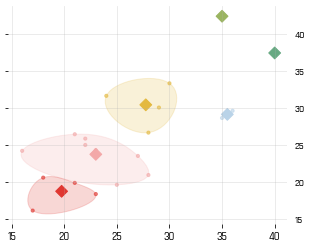

In [13]:
dataFrame = df.copy()
fig, ax = plt.subplots(1, figsize=(5,4))

ax.grid(axis='both', alpha=0.3,zorder=1)

# let's plot the intersection of the teams Point and xgPoint (with the right color), as well as the centroids of the clusters
plt.scatter(dataFrame.Pont, dataFrame.xPont, c=dataFrame.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='D', c=colors, s=70)

# we make the spines disappear
for spine in ax.spines.values():
    spine.set_visible(False)

# 
for e, i in enumerate(df.cluster.unique()):

    points = dataFrame[dataFrame.cluster == i][['Pont', 'xPont']].values

    if len(points) >2:
        # get the convex hull
        points = dataFrame[dataFrame.cluster == i][['Pont', 'xPont']].values
        hull = ConvexHull(points)
        x_hull = np.append(points[hull.vertices,0],
                           points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                           points[hull.vertices,1][0])

        # interpolate
        dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
        dist_along = np.concatenate(([0], dist.cumsum()))

        spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0, per=1)

        interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
        interp_x, interp_y = interpolate.splev(interp_d, spline)

        # plot shape
        plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)


you can see that we have six centroids, i.e. 6 clusters, we have 2 clusters to which only 1 team belongs

let's write it in a function

In [14]:
def plotti(axes, dataFrame):
    
    axes.grid(axis='both', alpha=0.3,zorder=1)
    
    colors=['#e03731','#67a982','#e4b93f','#f3a8a8','#b9d3e8','#9ab460']
    
    # let's plot the intersection of the teams Point and xgPoint (with the right color), as well as the centroids of the clusters
    axes.scatter(dataFrame.Pont, dataFrame.xPont, c=dataFrame.c, alpha = 0.6, s=10)
    axes.scatter(cen_x, cen_y, marker='D', c=colors, s=70)
    
    # we make the spines disappear
    for spine in axes.spines.values():
        spine.set_visible(False)
        
    
    for e, i in enumerate(df.cluster.unique()):
        
        points = dataFrame[dataFrame.cluster == i][['Pont', 'xPont']].values
       
        if len(points) >2:
            # get the convex hull
            points = dataFrame[dataFrame.cluster == i][['Pont', 'xPont']].values
            hull = ConvexHull(points)
            x_hull = np.append(points[hull.vertices,0],
                               points[hull.vertices,0][0])
            y_hull = np.append(points[hull.vertices,1],
                               points[hull.vertices,1][0])

            # interpolate
            dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
            dist_along = np.concatenate(([0], dist.cumsum()))
            
            spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0, per=1)
            
            interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
            interp_x, interp_y = interpolate.splev(interp_d, spline)
            
            # plot shape
            axes.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
        

we also want to make the connections stand out with lines

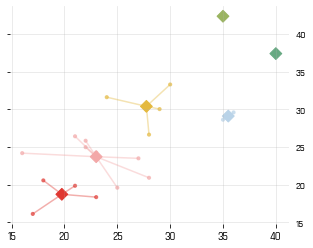

In [15]:
dataFrame = df.copy()
fig, ax = plt.subplots(1, figsize=(5,4))
ax.grid(axis='both', alpha=0.3,zorder=1)

for spine in ax.spines.values():
    spine.set_visible(False)
    
# plot data
ax.scatter(dataFrame.Pont, dataFrame.xPont, c=df.c, alpha = 0.6, s=10)

# plot centroids
ax.scatter(cen_x, cen_y, marker='D', c=colors, s=70)

# plot lines
for idx, val in dataFrame.iterrows():
    x = [val.Pont, val.cen_x,]
    y = [val.xPont, val.cen_y]
    ax.plot(x, y, c=val.c, alpha=0.4)

    # legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                       markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

    legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
                markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
    
    ## centroids
    cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
                markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

we got the same as with convex hull (interplate) only now we marked it with lines 

let's write it in a function

In [16]:
def plotti2(can, dataFrame):
    
    can.grid(axis='both', alpha=0.3,zorder=1)
    
    for spine in can.spines.values():
        spine.set_visible(False)
        
    # plot data
    can.scatter(dataFrame.Pont, dataFrame.xPont, c=dataFrame.c, alpha = 0.6, s=10)
    
    # plot centroids
    can.scatter(cen_x, cen_y, marker='D', c=colors, s=70)
    
    # plot lines
    for idx, val in df.iterrows():
        x = [val.Pont, val.cen_x,]
        y = [val.xPont, val.cen_y]
        can.plot(x, y, c=val.c, alpha=0.4)

    # legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                       markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

    legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
                markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
    
    ## centroids
    cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
                markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

we would like to display the teams belonging to the clusters in a separate table (with logos), as well as display the above two plots at the same time

In [17]:
df

,Team,real,xCalc,diff,Pont,xPont,Shots,oppShots,cumXg,opp_cXg,...,hg,ag,xg_1,oxg_1,act,cluster,cen_x,cen_y,c,kép
0,MTK,3,1,2,35,42.37,376,211,54.05,25.15,...,57,34,3.00,1.40,fire,5,35.00,42.37000,#9ab460,0
1,Diosgyor,1,2,-1,40,37.41,306,211,37.70,21.58,...,37,18,2.09,1.20,fire,1,40.00,37.41000,#67a982,0
2,Gyirmot,5,3,2,30,33.31,275,216,37.53,26.60,...,33,23,2.08,1.48,-,2,27.75,30.40500,#e4b93f,0
3,Gyori ETO,11,4,7,24,31.62,270,191,28.68,20.77,...,20,19,1.59,1.15,-,2,27.75,30.40500,#e4b93f,0
4,Szombathelyi Haladas,6,5,1,29,30.04,254,234,32.26,25.51,...,27,26,1.79,1.42,fire,2,27.75,30.40500,#e4b93f,0
5,Pecsi MFC,2,6,-4,36,29.60,207,187,23.92,17.99,...,21,13,1.33,1.00,-,4,35.50,29.11500,#b9d3e8,0
6,Szeged-Csanad,4,7,-3,35,28.63,200,218,26.17,23.28,...,24,17,1.45,1.29,-,4,35.50,29.11500,#b9d3e8,0
7,Ajka,7,8,-1,28,26.65,219,214,30.04,28.92,...,27,25,1.67,1.61,fire,2,27.75,30.40500,#e4b93f,0
8,Szentlorinc SE,16,9,7,21,26.43,241,227,25.79,26.16,...,26,30,1.43,1.45,-,3,23.00,23.71625,#f3a8a8,0
9,Budafoki MTE,15,10,5,22,25.84,213,262,26.99,28.05,...,24,25,1.50,1.56,fire,3,23.00,23.71625,#f3a8a8,0


In [21]:
def tabok(ax,num,dataFrame):
    
    # path of the team logos
    path = '/Users/arpadambrusz/Desktop/jupyter_work/logók/logók_nb2 másolat/'
    
    # the num is a number of cluster
    
    df_example_2 = dataFrame[dataFrame.cluster==num][['kép','Team','xPont','Pont','xCalc','real','act','cluster']].reset_index(drop=True)
    
    columns = list(df_example_2.columns)
   
    # we define the number of columns and rows (+1 the logos)
    ncols = len(df_example_2.columns)+1
    nrows = df_example_2.shape[0]

    ax.set_xlim(0, ncols +1.3)
    ax.set_ylim(0, nrows + 1)

    # we adjust the distance between the columns aesthetically
    positions = [0.5,  1.3, 5,  6.,  7.,  8.,  9., 10. ]


    # add table's main text
    for e, i in enumerate(range(nrows)):
        for j, column in enumerate(columns):
            
            if j == 0:
                ha = 'center'
            else:
                ha = 'center'
                
            if column != 'Team' and column != 'kép':
                pp = df_example_2[column].iloc[i]
                if type(pp) == str:
                    text_label = f'{pp}'
                if type(pp) != str:
                    text_label = str(round(pp,2))
                weight = 'normal'
                ax.annotate(
                    xy=(positions[j], i + .5),
                    text=text_label,
                    ha=ha,
                    va='center',
                    weight=weight,
                    size=10,
                    fontfamily='Rajdhani',
                    alpha=0.7
                )
                
            if column == 'Team' :
                ha = 'left'
                pp = df_example_2[column].iloc[i]
                text_label = f'{pp}'
                weight = 'normal'
                ax.annotate(
                    xy=(positions[j], i + .5),
                    text=text_label,
                    ha=ha,
                    va='center',
                    weight=weight,
                    size=11,
                    fontfamily='Rajdhani',
                    alpha=0.7
                )
            # team logos
            if column == 'kép':
                logo = image.imread(f'{path}{df_example_2.iloc[e].Team}.jpg')

                imagebox = OffsetImage(logo, zoom = 0.15)
                ab = AnnotationBbox(imagebox, (positions[j], i+.5), frameon = False)
                ax.add_artist(ab)

    column_names = ['Logo','Team','xPoint','Point','xCalc','real','act','cluster']

    for index, c in enumerate(column_names):
            
            if index == 0:
                ha = 'left'
            if index == 1:
                ha = 'left'
                ax.annotate(
                xy=(positions[index], nrows + .25),
                text=column_names[index],
                ha=ha,
                va='bottom',
                alpha=0.7,
                fontfamily='Rajdhani',
                weight='medium',
                size=10

                )
            if index >1:
                ha = 'center'
                ax.annotate(
                xy=(positions[index], nrows + .25),
                text=column_names[index],
                ha=ha,
                va='bottom',
                alpha=0.7,
                fontfamily='Rajdhani',
                weight='medium',
                size=10
                )        

    # Add dividing lines
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1, color='gray', marker='', zorder=4)
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1, color='gray', marker='', zorder=4)
    
    for x in range(1, nrows):
        ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

    colors=['#e03731','#67a982','#e4b93f','#f3a8a8','#b9d3e8','#9ab460']
    pok = [int(x) for x in df_example_2.cluster.unique()]
    
    for ok in pok:
            mx = max(df_example_2[df_example_2.cluster == ok].index)
            mn = min(df_example_2[df_example_2.cluster == ok].index)

            ax.fill_between(
                            x = [ax.get_xlim()[0], ax.get_xlim()[1]],
                            y1 =mx+1,
                            y2 = mn,
                            color = colors[ok],
                            alpha=0.4,
                            zorder = 2,
                            ec = "None"
                        )

    ax.set_axis_off()

we write a function to display the plots/tables on a plot

In [23]:
def plot_cluster(rounds, dataFrame, J=''):   
    
    fig = plt.figure(dpi=200)
    fig.set_figheight(11.5)
    fig.set_figwidth(19)

    signature = 'Canonatia'

    # axes settings - we need to pay attention to location and rowspan and colspan
    
    dc = {0:[0,2,4],1:[0,2,4],2:[0,3]}

    axEs = ['ax1','ax2','ax3','ax4','ax5','ax6','ax7','ax8']

    fg = {}

    e = 0

    for tim in dc:


        for x in dc[tim]:

                if e <= 5:
                    n1,n2 = 2,1

                if e > 5:
                    n1,n2 = 3,3

                fg[axEs[e]] = plt.subplot2grid(shape=(4, 6), loc=(tim,x), colspan=n1, rowspan=n2)
                
                e+=1
        
    fig_text(
            x=0.014, y=.99, 
            s=f'<Merkantil Bank Liga NB2. {rounds}. round - Cluster - (based on xPoint, Point, xPos, Pos) >  \n',
            va='bottom', ha='left',
            alpha=0.7,
            fontsize=20, font='Kdam Thmor Pro'
        )


    plotti(fg['ax7'],dataFrame)
    plotti2(fg['ax8'],dataFrame)

    for num in range(6):
        tabok(fg[axEs[num]],num,dataFrame)
    
    
    fig.tight_layout();
    fig.text(0.67,0.985,"Data provided by InStat - ambrusz" , fontfamily=signature,fontstyle= 'italic',fontsize= 60,)
    
    if J:
        plt.savefig(f'/Users/arpadambrusz/Desktop/nb2{rounds}_cluster.png',dpi=200, bbox_inches="tight")

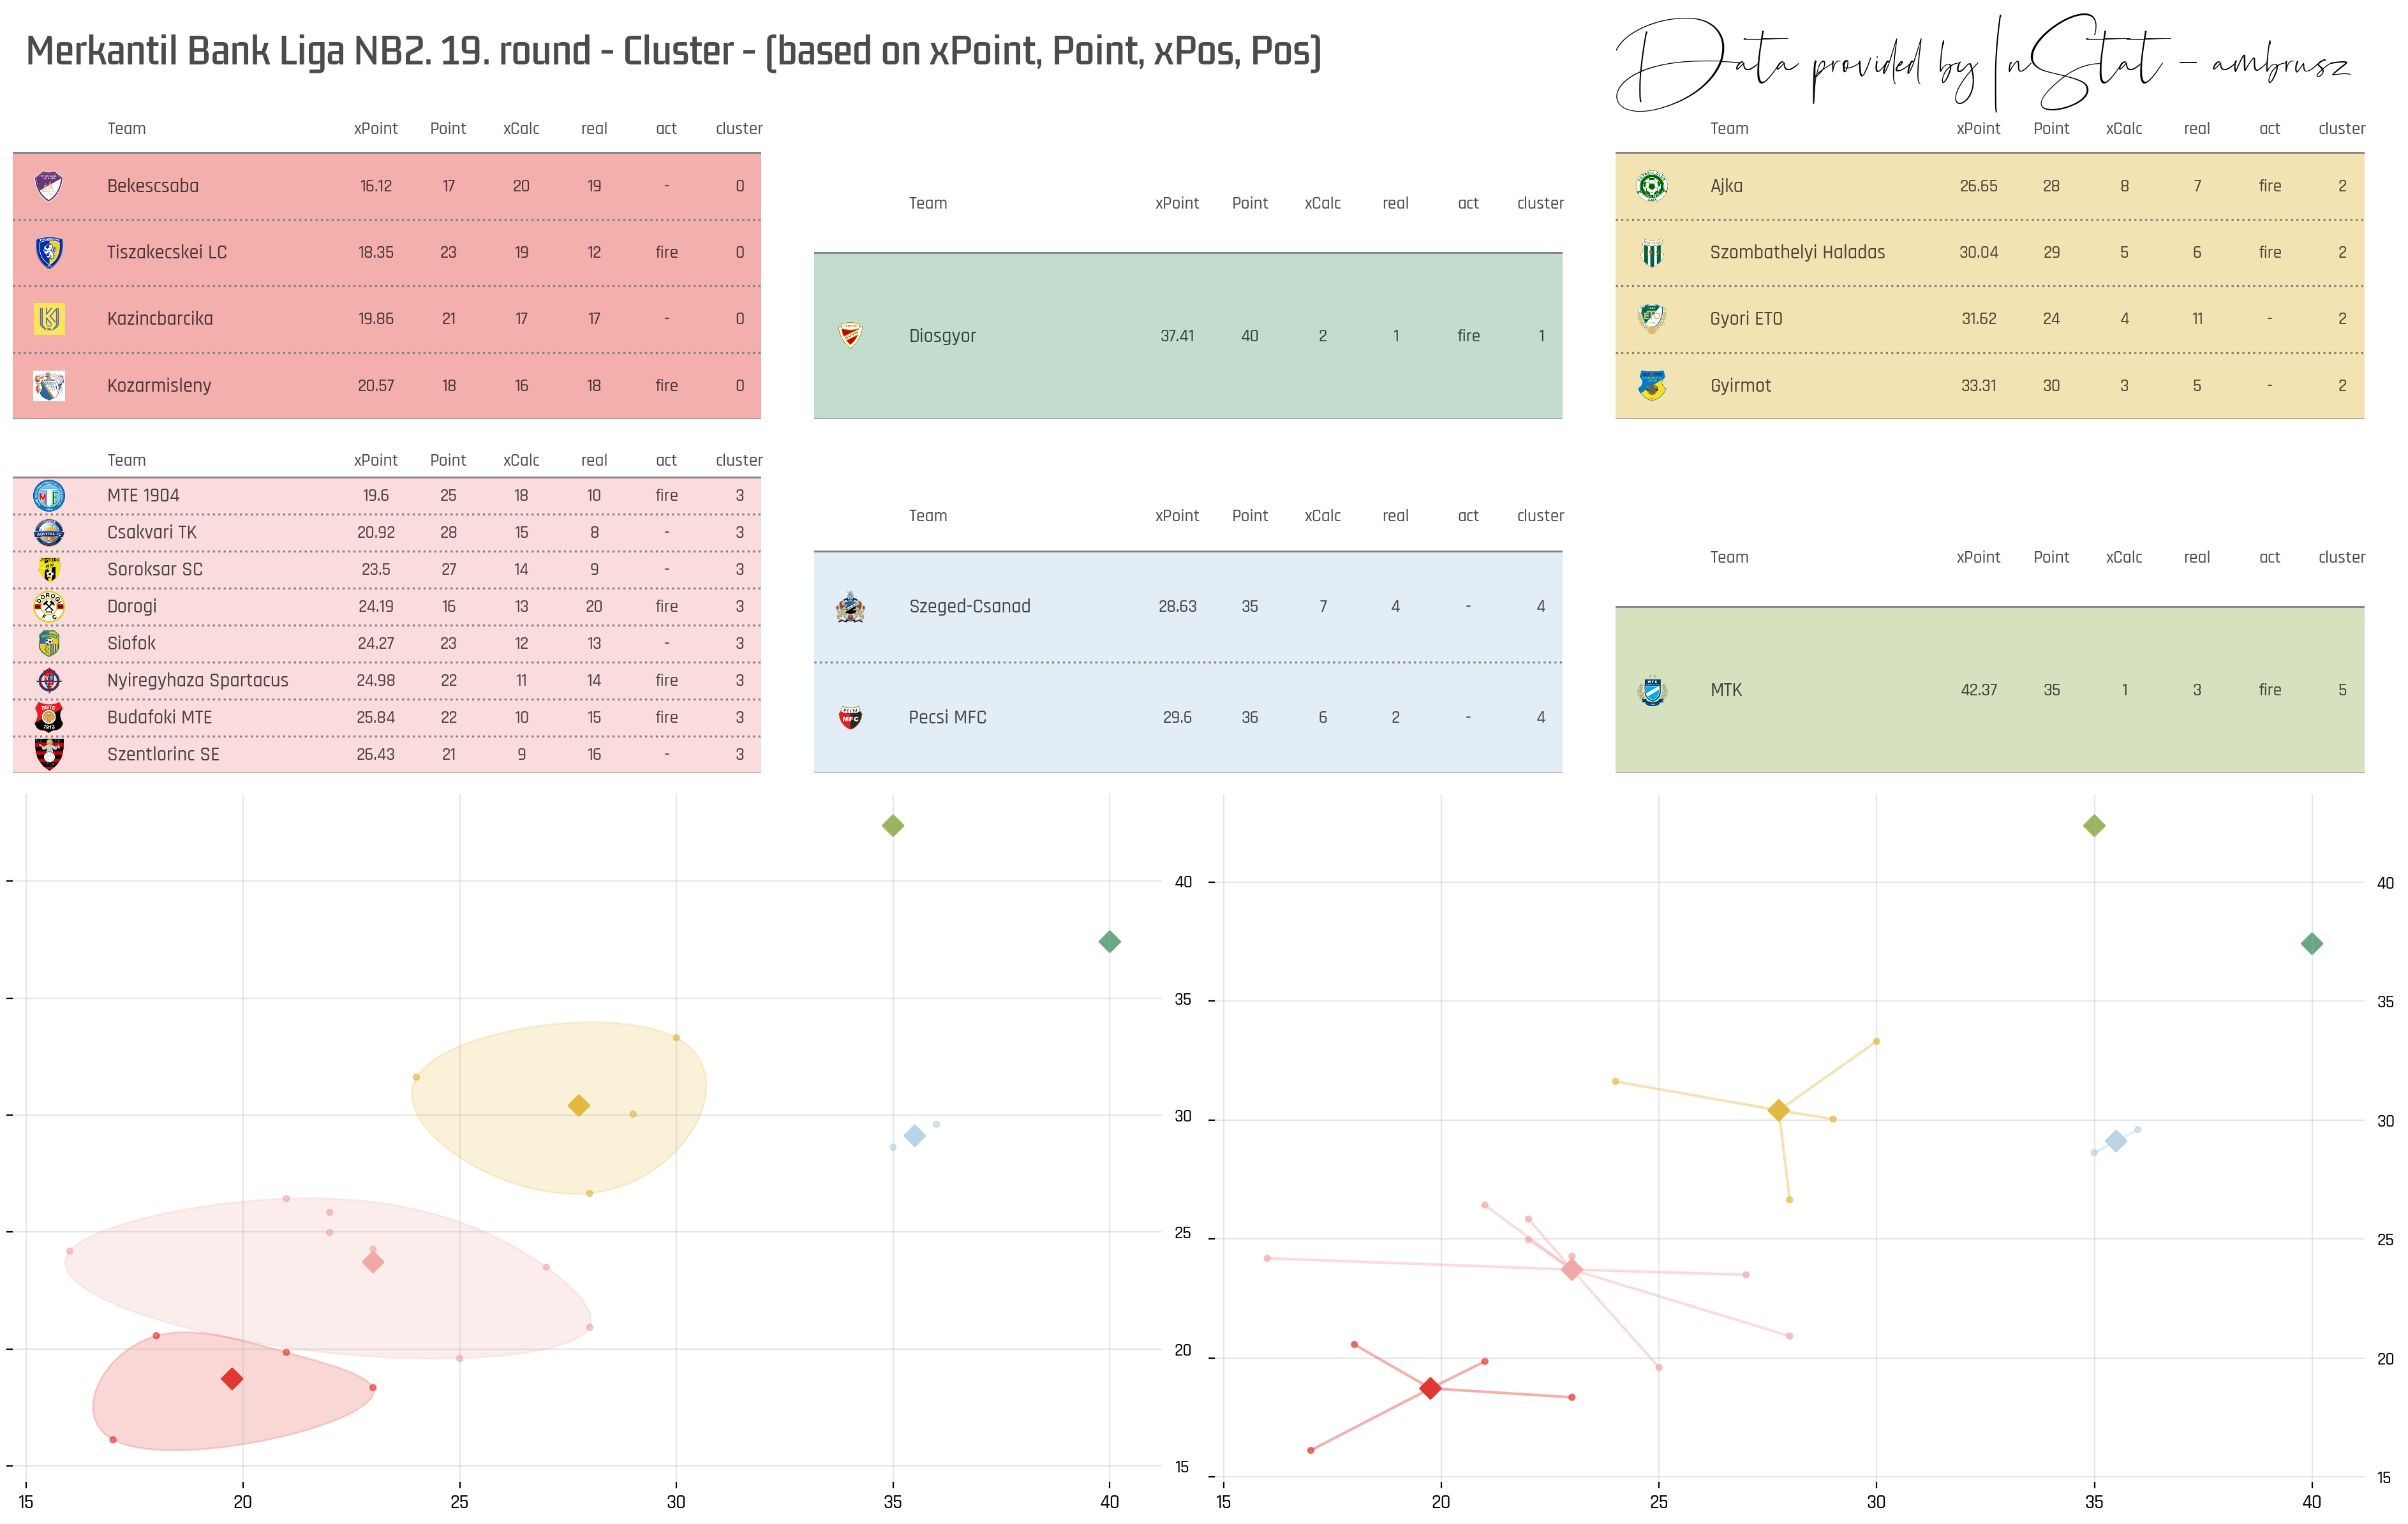

In [24]:
plot_cluster(19,df)